# Blue PhOLED analysis using machine learning

- This notebook present some machine learning models to predict the efficiency of blue PhOLED using only the materials used for that particular device.


## 1. Import some libraries and data from excel file

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
# plt.style.available

In [3]:
sns.set_style('white')

In [4]:
# read excel file
df = pd.read_csv('data.csv')
df = df[list(df.columns)[1:]]
print(df.shape)
df.head()

(313, 32)


,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_cathode1,cd/A
0,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,5.0
1,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,4.0
2,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,9.0
3,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,12.0
4,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,8.0


In [5]:
#Checking for missing data
NAs = df.isnull().sum()
NAs.sort_values(0, ascending=False)
NAs[NAs > 0] #check wnumber of null values in column

homo_HIL               3
total_ETL_thickness    3
lumo_ETL1              3
homo_ETL1              3
lumo_ETL2              3
homo_ETL2              3
dtype: int64

In [6]:
np.nonzero(pd.isnull(df.values).any(1)) #check the index of missing value

(array([186, 187, 188, 191, 192, 193, 213, 235, 236], dtype=int64),)

In [7]:
# drop the missing data
df.dropna(axis=0, inplace=True)
print(df.shape)

(304, 32)


In [8]:
df.head()

,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_cathode1,cd/A
0,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,5.0
1,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,4.0
2,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,9.0
3,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,12.0
4,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,8.0


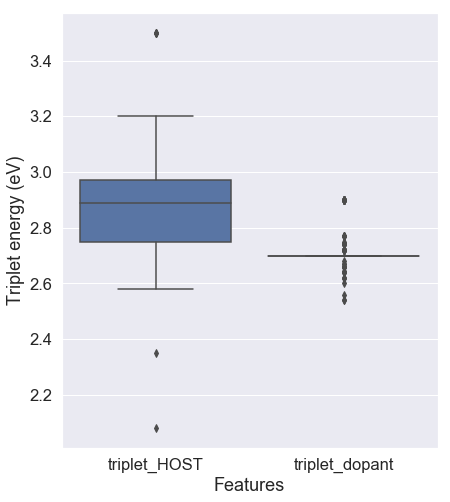

In [9]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=[6,8])
ax = sns.boxplot(data=df[['triplet_HOST', 'triplet_dopant']], orient='v')
ax.set(xlabel='Features', ylabel='Triplet energy (eV)');
# ax.set_ylabel('Triplet energy (eV)' ,fontsize=20)
# ax.set_xtick(fontsize=20) ;

### We can observe the distribution of each feature used in our model

In [8]:
thickness_col = ['thickness_HIL','thickness_HTL1','thickness_HTL2','thickness_HTL3', 'total_HTL_thickness',
                 'thickness_EML', 'total_ETL_thickness','thickness_ETL1', 'thickness_ETL2','thickness_cathode1']

In [47]:
df.iloc[:,:12].columns.tolist()

['homo_HIL',
 'thickness_HIL',
 'lumo_HTL1',
 'homo_HTL1',
 'thickness_HTL1',
 'lumo_HTL2',
 'homo_HTL2',
 'thickness_HTL2',
 'lumo_HTL3',
 'homo_HTL3',
 'thickness_HTL3',
 'total_HTL_thickness']

In [70]:
df.iloc[:,12:24].columns.tolist()

['triplet_HTL',
 'lumo_EML',
 'homo_EML',
 'triplet_HOST',
 'thickness_EML',
 'lumo_dopant',
 'homo_dopant',
 'triplet_dopant',
 'dopant_percentage',
 'triplet_ETL',
 'total_ETL_thickness',
 'lumo_ETL1']

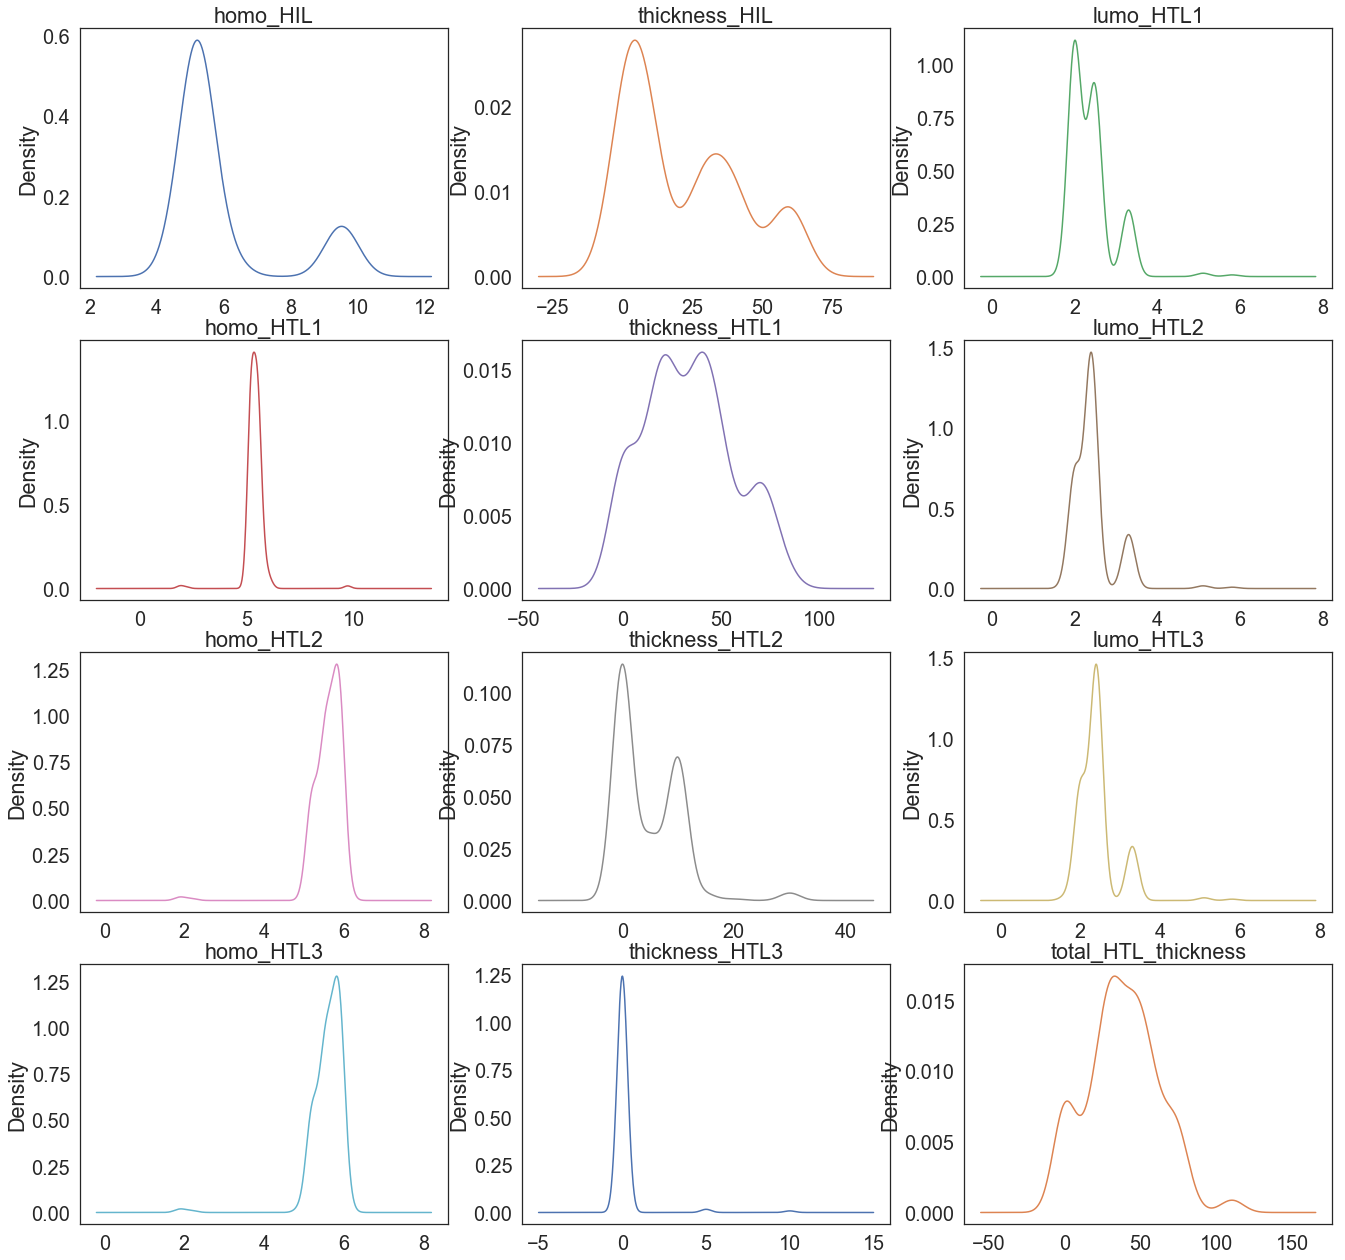

In [76]:
sns.set(font_scale=1.8, style='white')
df.iloc[:,:12].plot(kind='density', subplots=True, layout=(4,3), legend=False,
                    sharex=False, figsize=(20,22), title=df.iloc[:,:12].columns.tolist());
# plt.legend(loc='upper right');
# plt.savefig('density.png', format='png', dpi=300)

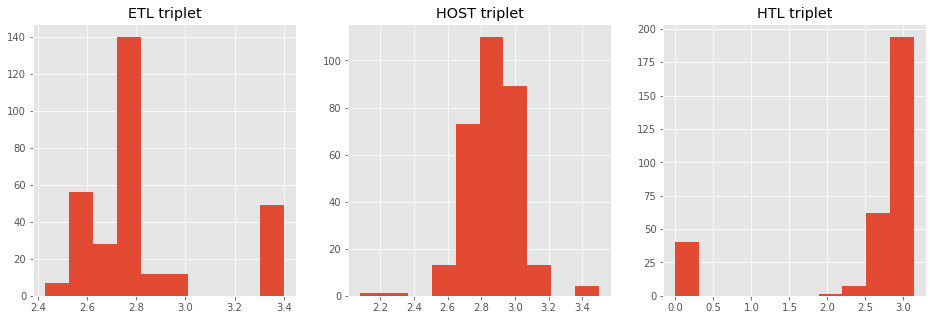

In [16]:
# see for triplet energy only 
plt.figure(figsize=(16,5))
plt.subplot(131)
df.triplet_ETL.hist()
plt.title('ETL triplet')

plt.subplot(132)
df.triplet_HOST.hist()
plt.title('HOST triplet')

plt.subplot(133)
df.triplet_HTL.hist()
plt.title('HTL triplet');

In [9]:
# df[list(df.columns)[:8]]

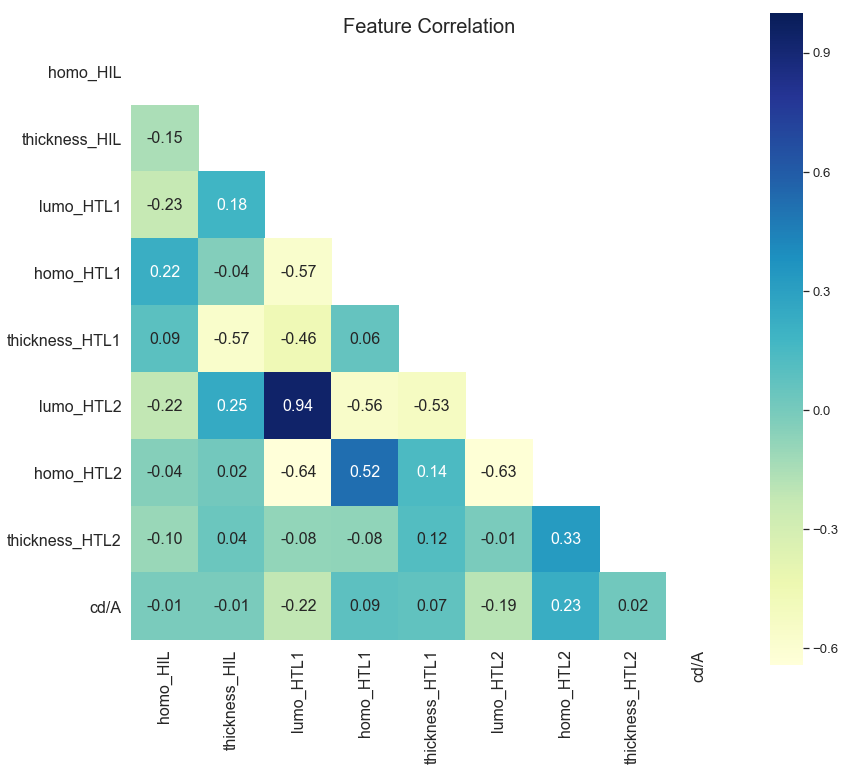

In [14]:
sns.set(font_scale=1.2, style='white')
X = df[list(df.columns)[:8] + ['cd/A']]

corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(12, 12))
    sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', mask=mask, annot=True, fmt = '.2f', 
                annot_kws={"size":16})
    plt.yticks(rotation=0,fontsize=16)
    plt.xticks(rotation=90,fontsize=16)
    plt.title('Feature Correlation ',fontsize=20)
#     plt.savefig('heatmap.png', format='png', dpi=600)
    plt.show();

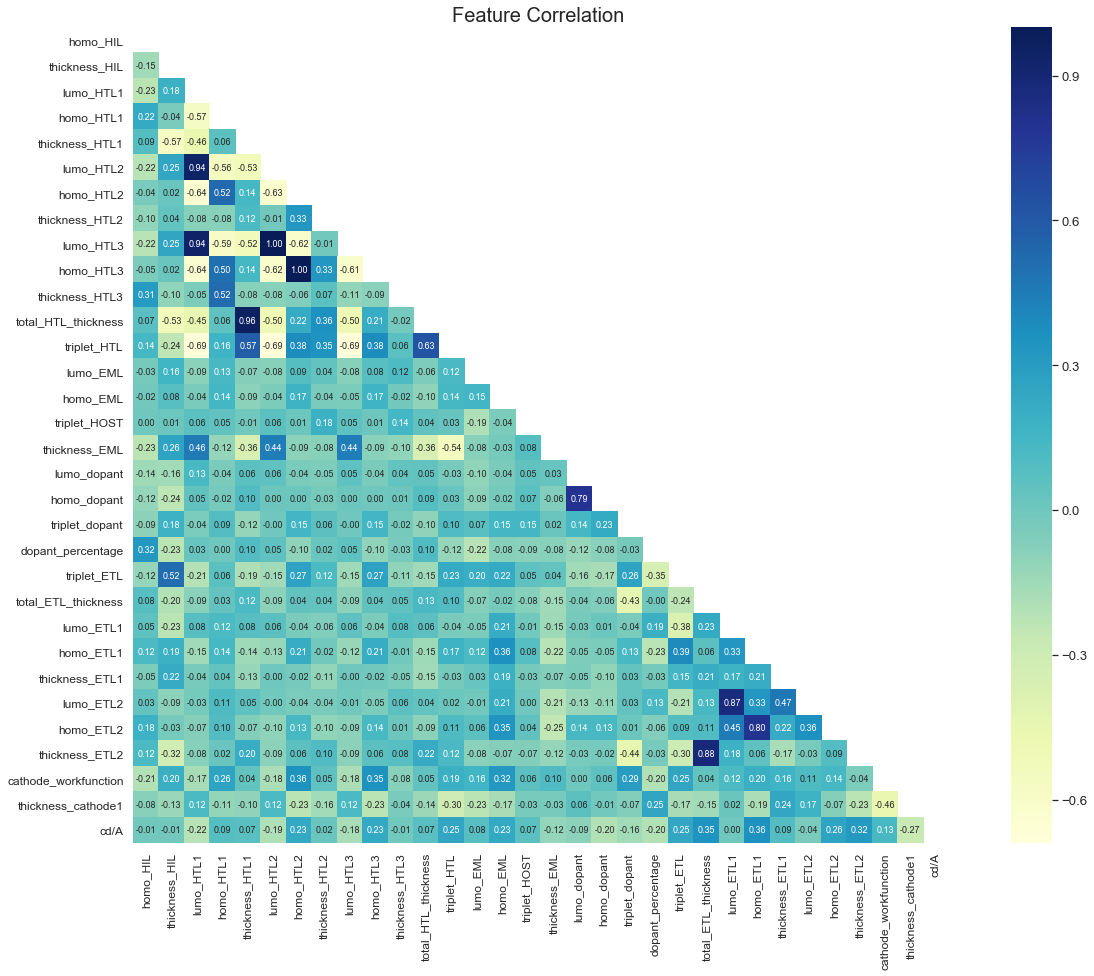

In [12]:
X = df[list(df.columns)[:]]

corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', mask=mask, annot=True, fmt = '.2f', 
                annot_kws={"size":9})
    plt.yticks(rotation=0,fontsize=12)
    plt.xticks(rotation=90,fontsize=12)
    plt.title('Feature Correlation ',fontsize=20)
#     plt.savefig('heatmap.png', format='png', dpi=600)
    plt.show();

In [18]:
cor_dict = corr['cd/A'].to_dict()
del cor_dict['cd/A']
print("List the features in descending order of their correlation with cd/A:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

List the features in descending order of their correlation with cd/A:

homo_ETL1:   0.36066287368551775
total_ETL_thickness:   0.34810137455782164
thickness_ETL2:   0.31965461467554845
thickness_cathode1:   -0.2748079175250064
homo_ETL2:   0.26314564918729483
triplet_HTL:   0.25420517320069697
triplet_ETL:   0.24558228644664232
homo_EML:   0.23370570082636638
homo_HTL3:   0.2325687994008805
homo_HTL2:   0.22929112421870246
lumo_HTL1:   -0.21684195864548841
homo_dopant:   -0.20294289060816115
dopant_percentage:   -0.20228523234190027
lumo_HTL2:   -0.18834688598230867
lumo_HTL3:   -0.1811694533651666
triplet_dopant:   -0.15561968724494707
cathode_workfunction:   0.13328857093392174
thickness_EML:   -0.11643292905322172
lumo_dopant:   -0.09364168028700587
thickness_ETL1:   0.0909831051339595
homo_HTL1:   0.08675263278257586
lumo_EML:   0.0797359727280574
total_HTL_thickness:   0.07107880317797283
thickness_HTL1:   0.07027984761108394
triplet_HOST:   0.06941699710909094
lumo_ETL2:   -0.042

In [19]:
X = df.iloc[:, :-1]
y = df[['cd/A']]
print(X.shape)
X.head()

(304, 31)


,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,triplet_ETL,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_cathode1
0,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0
1,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0
2,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0
3,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0
4,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0


In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

rs = 24

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=rs)

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, LeaveOneOut

regressor = RandomForestRegressor(n_estimators=130, random_state=7)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

kfold = KFold(n_splits=5, shuffle=True, random_state=rs)
loo = LeaveOneOut()
# r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
# print('R2 scores: ', r2_scores)
# print('mean R2 score: ', r2_scores.mean(), '\n')

# mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R-squared test:  0.7307469845087882
RMSE:  7.809959186583799


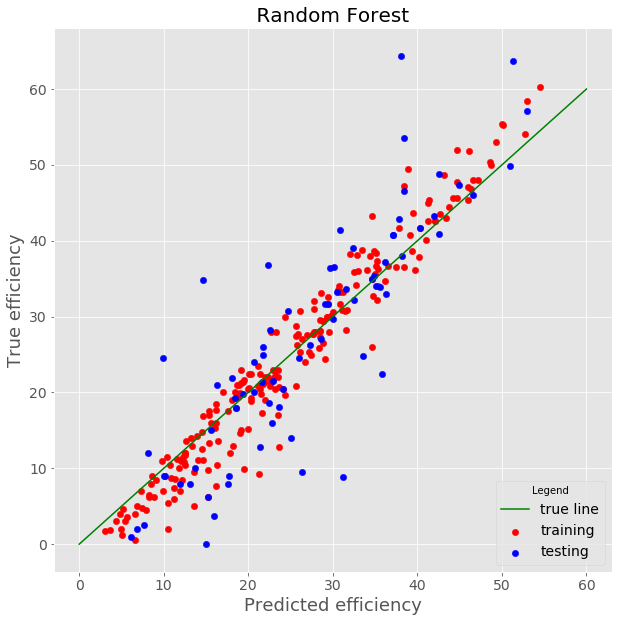

In [22]:
pred_train = regressor.predict(X_train)

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' Random Forest ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

In [23]:
importance = regressor.feature_importances_.tolist()
names = list(X)

importance, names = zip(*sorted(zip(importance, names), reverse=True))
importance = [round(float(i), 3) for i in importance]

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'column', 'importance'))
for i, (name, coef) in enumerate(zip(names, importance)):
    print(fmt.format(i, name, coef))

        column              importance
0       triplet_ETL         0.18
1       homo_EML            0.08
2       total_ETL_thickness 0.075
3       triplet_HOST        0.074
4       homo_dopant         0.058
5       triplet_HTL         0.048
6       thickness_HIL       0.043
7       triplet_dopant      0.042
8       lumo_EML            0.036
9       homo_HTL3           0.035
10      thickness_EML       0.03
11      lumo_dopant         0.027
12      homo_HIL            0.026
13      homo_HTL1           0.026
14      homo_ETL1           0.026
15      thickness_cathode1  0.024
16      homo_HTL2           0.023
17      thickness_ETL2      0.021
18      thickness_HTL1      0.02
19      total_HTL_thickness 0.016
20      lumo_ETL2           0.016
21      dopant_percentage   0.016
22      lumo_ETL1           0.014
23      homo_ETL2           0.01
24      thickness_HTL2      0.008
25      lumo_HTL1           0.007
26      cathode_workfunction0.007
27      lumo_HTL3           0.004
28      lumo_H

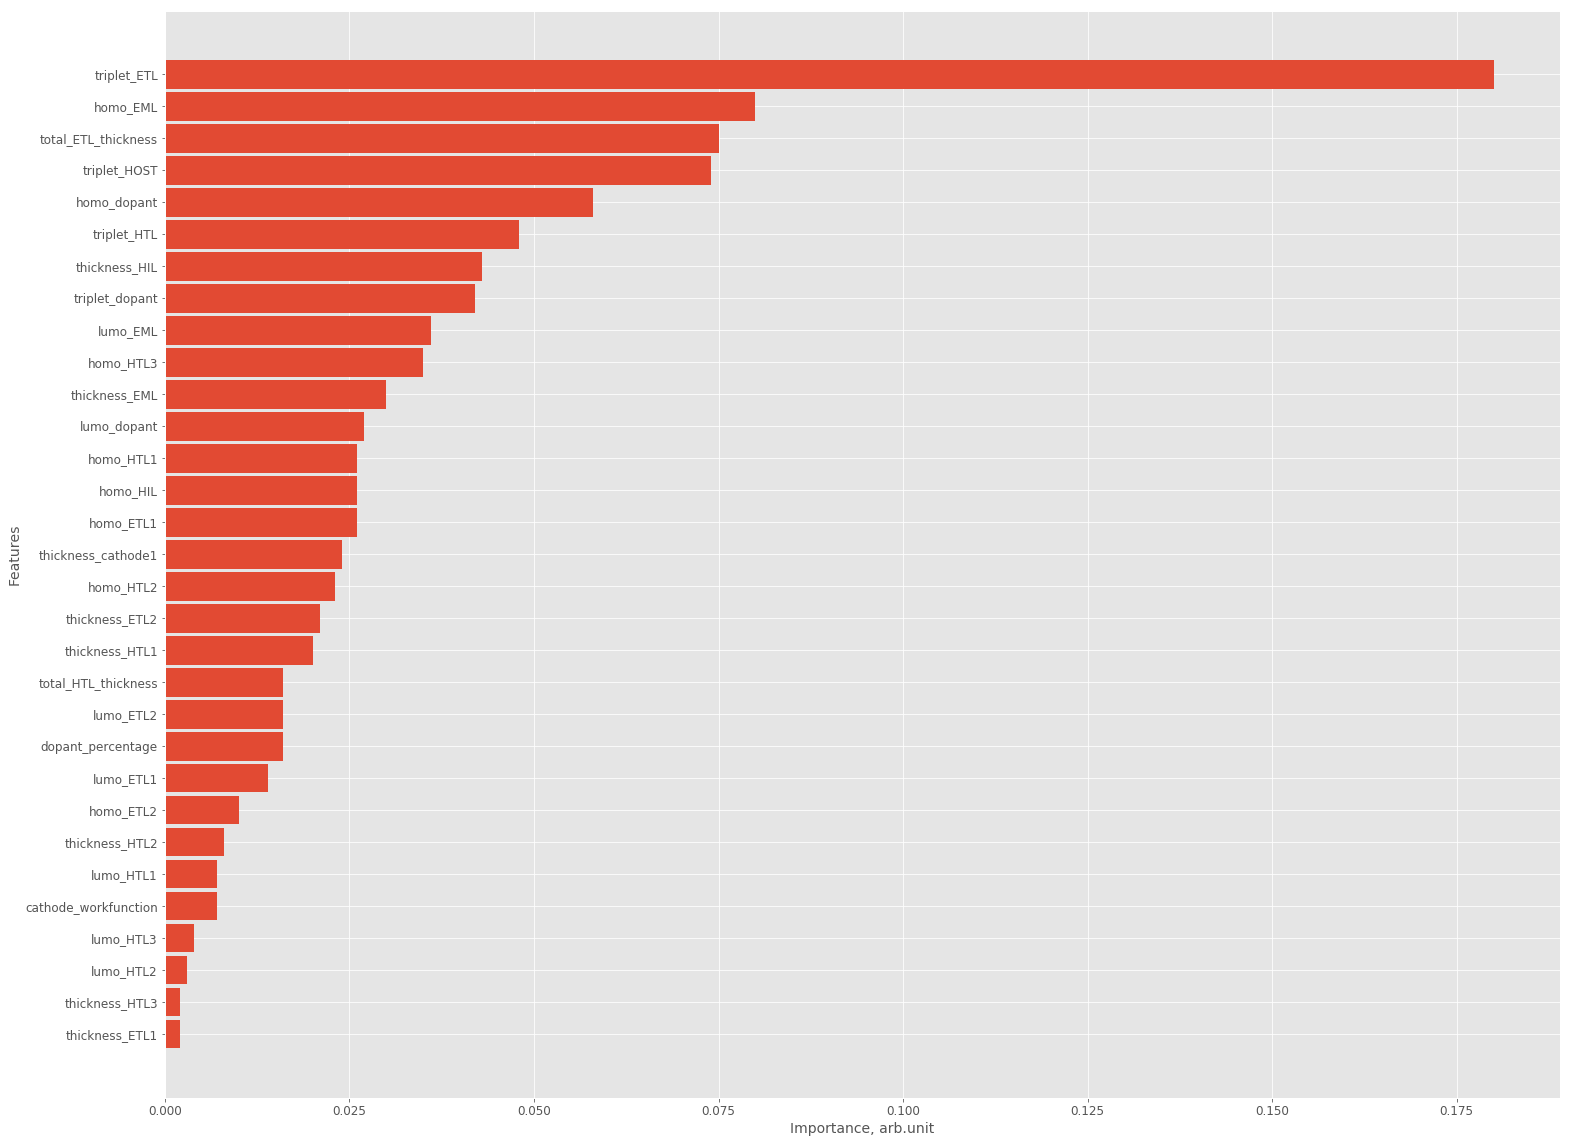

In [24]:
importance, names = zip(*sorted(zip(importance, names), reverse=False))
x = np.arange(X.shape[1])
plt.figure(figsize=(25,20));
fig = plt.barh(x, importance, 0.9, align='center')
plt.xlabel('Importance, arb.unit',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.yticks(x,names,fontsize=12)
plt.xticks( fontsize=12);

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# estimator = list(np.arange(100, 1000, 100))
# parameters = {
#                 'n_estimators': estimator,
#                 'max_depth': [None, 1, 2, 3],
#                 'min_samples_split': [2, 3]
#              }
# regressor = RandomForestRegressor(random_state=2)
# reg = GridSearchCV(regressor, parameters, verbose=1, scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1 )

# reg.fit(X_train, y_train.values.ravel())
# print('Best score: %0.3f' % reg.best_score_)
# print('Best parameters set:')
# best_parameters = reg.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print('\t%s: %r' % (param_name, best_parameters[param_name]))

# y_predictions = reg.predict(X_test)
# print('r2 on test set:', r2_score(y_test, y_predictions))

# scores = cross_val_score(reg, X, y.values.ravel(), cv=kfold)
# print('scores: ', -scores)
# print('mean score: ', -scores.mean())

## XGB

In [25]:
from xgboost import XGBRegressor, plot_importance

regressor = XGBRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
# print('R2 scores: ', r2_scores)
# print('mean R2 score: ', r2_scores.mean(), '\n')

# mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R-squared test:  0.6683409344572322
RMSE:  8.667910388274796


## Adaboost

In [24]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor(n_estimators=130)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
# print('R2 scores: ', r2_scores)
# print('mean R2 score: ', r2_scores.mean(), '\n')

# mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R-squared test:  0.234516746987
RMSE:  12.5195620795


## SVR

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [34]:
from sklearn.svm import SVR

regressor = SVR(gamma='scale')
regressor.fit(X_train_norm, y_train.values.ravel())
y_predictions = regressor.predict(X_test_norm)

# kfold = KFold(n_splits=5, shuffle=True, random_state=rs)
# loo = LeaveOneOut()
# r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
# print('R2 scores: ', r2_scores)
# print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test_norm, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

RMSE mean:  13.343995986253091 

R-squared test:  0.11437425949631419
RMSE:  14.164250270241421


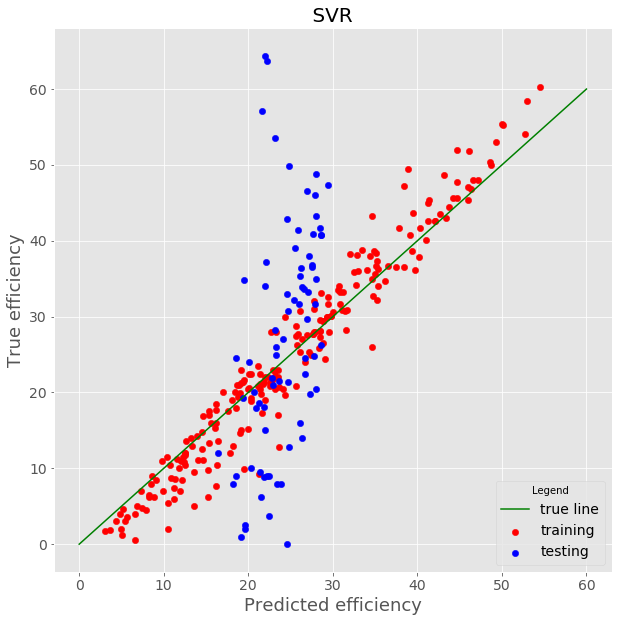

In [35]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' SVR ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

## Gradient boosting 

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
# print('R2 scores: ', r2_scores)
# print('mean R2 score: ', r2_scores.mean(), '\n')

# mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R-squared test:  0.6996232026033578
RMSE:  8.249006915349801


## KNN

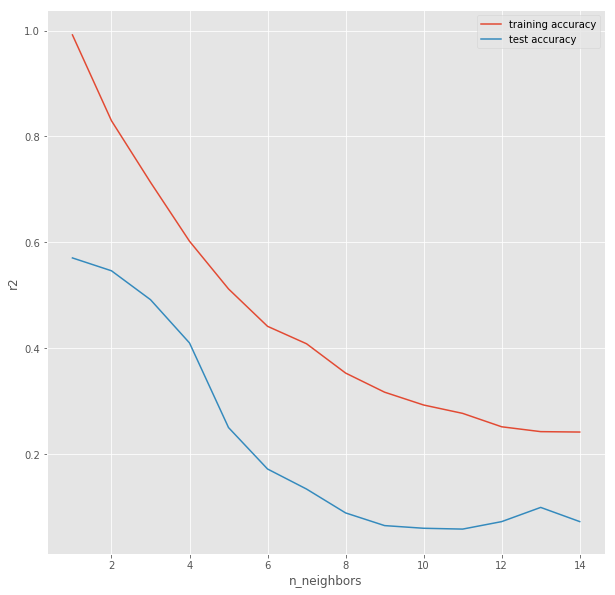

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaler.fit(X_train)
xtrain_scaled = scaler.transform(X_train)
xtest_scaled = scaler.transform(X_test)

training_coefficient = []
test_coefficient = []
# try n_neighbors from 1 to 15
neighbors_settings = range(1, 15)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(xtrain_scaled, y_train)
    # record training set accuracy
    training_coefficient.append(knn.score(xtrain_scaled, y_train))
    # record test set accuracy
    test_coefficient.append(knn.score(xtest_scaled, y_test))
    
plt.plot(neighbors_settings, training_coefficient, label="training accuracy")
plt.plot(neighbors_settings, test_coefficient, label="test accuracy")
plt.ylabel("r2")
plt.xlabel("n_neighbors")
plt.legend()

In [38]:
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
# print('R2 scores: ', r2_scores)
# print('mean R2 score: ', r2_scores.mean(), '\n')

# mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R-squared test:  0.3826455893860844
RMSE:  11.825942254658878


## MLP regressor

In [40]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

In [41]:
regressor = MLPRegressor(random_state=12, hidden_layer_sizes=(1000, 500, 100), activation='relu', solver='adam', max_iter=100000)
regressor.fit(X_train_norm, y_train.values.ravel())

y_predictions = regressor.predict(X_test_norm)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

# mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test_norm, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [0.35497978 0.47248364 0.30848093 0.60205763 0.49310851]
mean R2 score:  0.4462220971415866 

R-squared test:  0.7054465785831239
RMSE:  8.168654211302623


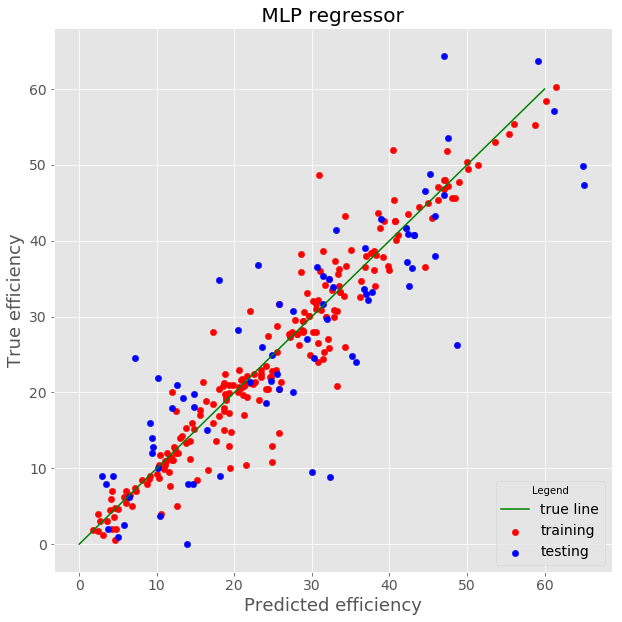

In [43]:
pred_train = regressor.predict(X_train_norm)

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' MLP regressor ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
#     'hidden_layer_sizes': [i for i in range(8,24)],
              'activation': ['tanh', 'logistic'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.001],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [100000],
              'early_stopping': [True],
              'warm_start': [False]}

reg = GridSearchCV(regressor, param_grid=param_grid, scoring='neg_mean_squared_error',
                   cv=kfold, verbose=True, pre_dispatch='2*n_jobs')
reg.fit(X_train_norm, y_train.values.ravel())

y_predictions = reg.predict(X_test_norm)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   48.6s finished


In [45]:
# # Check how our model is doing on test set
# print('R-squared test: ', reg.score(X_test_norm, y_test))
# print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

## Keras neural network

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor


In [71]:
# define and fit the final model
def baseline_model():
    model = Sequential()
    model.add(Dense(31, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(36, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mse', optimizer='adam')    
    return model
    
regressor = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=300, verbose=False)

regressor.fit(np.array(X_train_norm), np.array(y_train));

In [72]:
y_predictions = regressor.predict(np.array(X_test_norm))
pred_train = regressor.predict(np.array(X_train_norm))

In [73]:
# r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
# print('R2 scores: ', r2_scores)
# print('mean R2 score: ', r2_scores.mean(), '\n')

# mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# # Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test_norm, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R-squared test:  -962.3718872070312
RMSE:  31.02211872896433


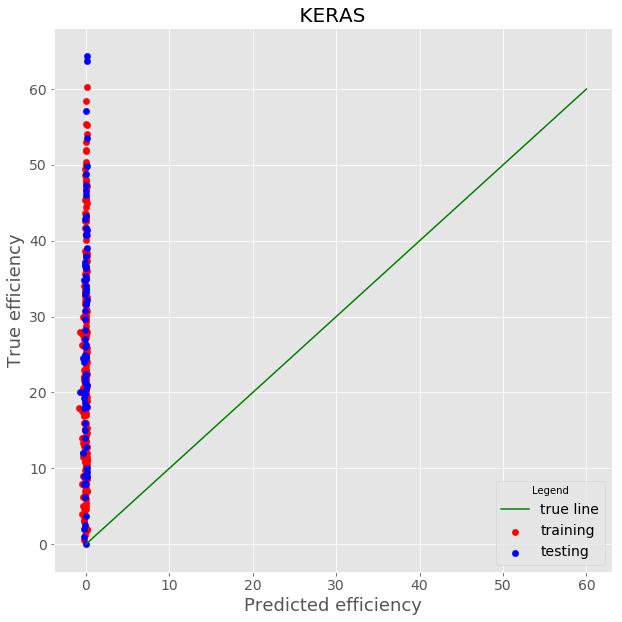

In [74]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' KERAS ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

In [ ]:
# https://stackoverflow.com/questions/48458635/getting-very-bad-prediction-with-kerasregressor